In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

from piecewise import PiecewiseQuadratic, BiWeight, Huber, L2Loss, L1Loss
from rfpop import rfpop, get_breakpoints

### Testing classes from piecewise.py

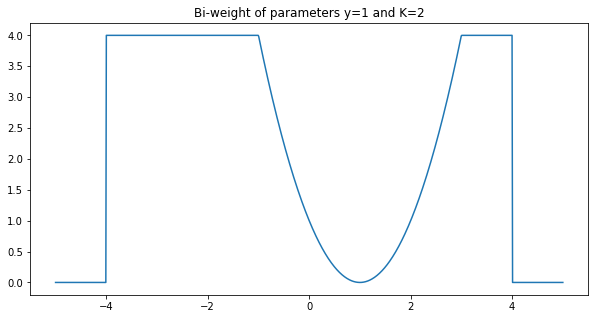

In [10]:
bi_weight = BiWeight(1, 2, -4, 4)
t = np.linspace(-5, 5, 1000)
y = np.array([bi_weight(x) for x in t])
plt.figure(figsize=(10, 5))
plt.plot(t, y)
plt.title("Bi-weight of parameters y=1 and K=2")
plt.show()

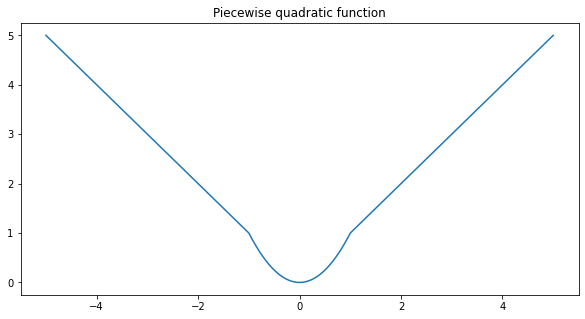

In [12]:
polynom = PiecewiseQuadratic([(-10,-1),(-1,1),(1,10)], [[-1,0],[1,0,0],[1,0]])
t = np.linspace(-5, 5, 1000)
y = np.array([polynom(x) for x in t])
plt.figure(figsize=(10, 5))
plt.plot(t, y)
plt.title("Piecewise quadratic function")
plt.show()

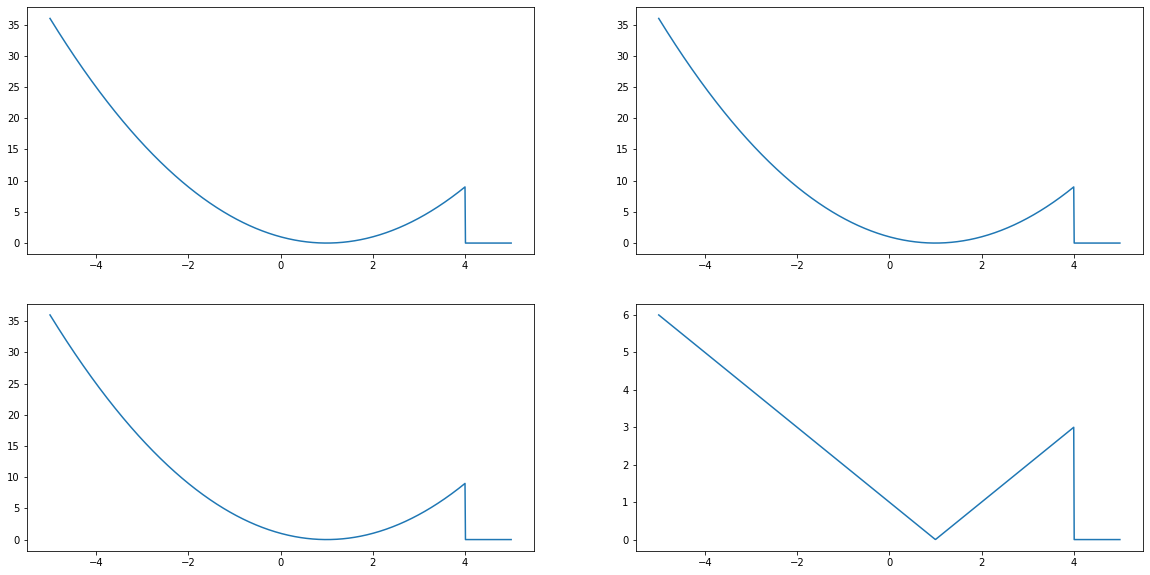

In [13]:
t = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

loss = BiWeight(1, 7, -6, 4)
y = np.array([loss(x) for x in t])
ax[0, 0].plot(t, y)

loss = Huber(1, 7, -6, 4)
y = np.array([loss(x) for x in t])
ax[0, 1].plot(t, y)

loss = L2Loss(1, -6, 4)
y = np.array([loss(x) for x in t])
ax[1, 0].plot(t, y)

loss = L1Loss(1, -6, 4)
y = np.array([loss(x) for x in t])
ax[1, 1].plot(t, y)

plt.show()

### Changepoint detection tests

  0%|          | 0/24 [00:00<?, ?it/s]

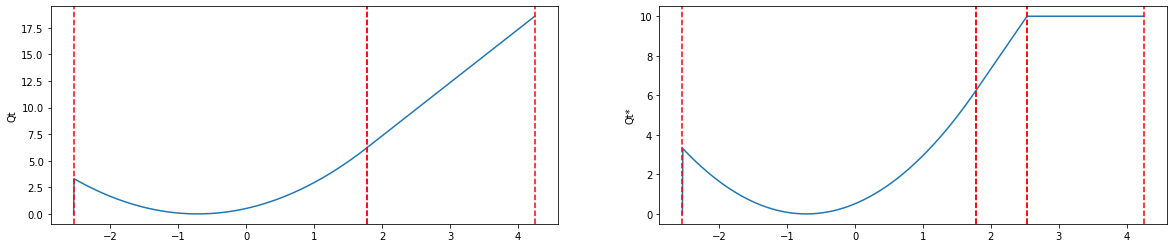

  4%|▍         | 1/24 [00:00<00:04,  4.75it/s]

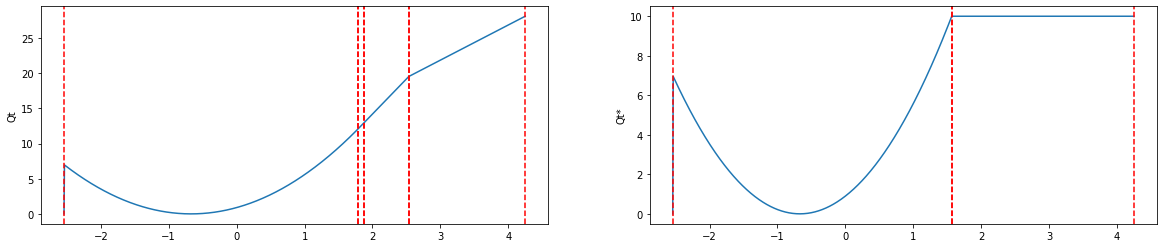

  8%|▊         | 2/24 [00:00<00:04,  4.41it/s]

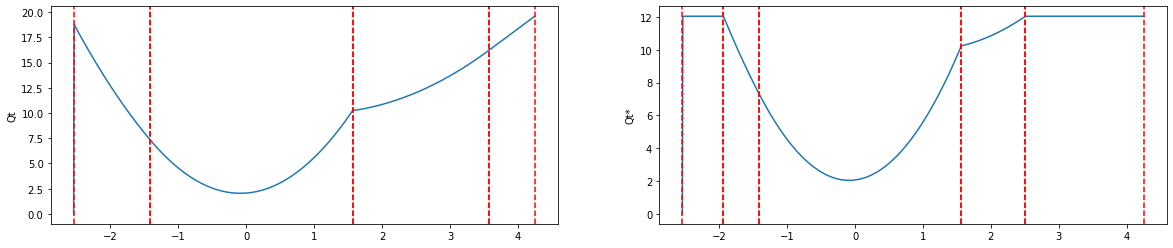

 12%|█▎        | 3/24 [00:00<00:04,  4.52it/s]

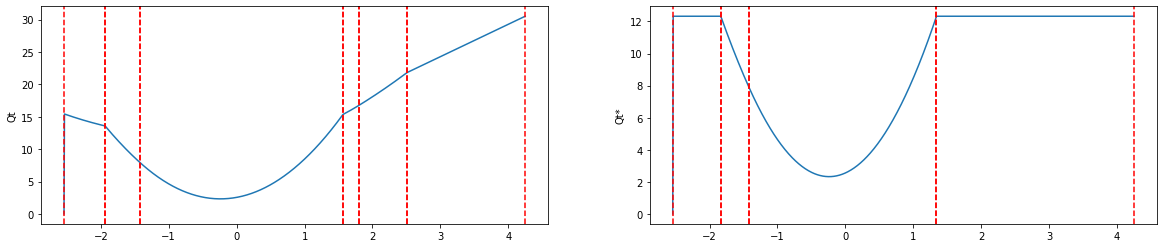

 17%|█▋        | 4/24 [00:00<00:04,  4.45it/s]

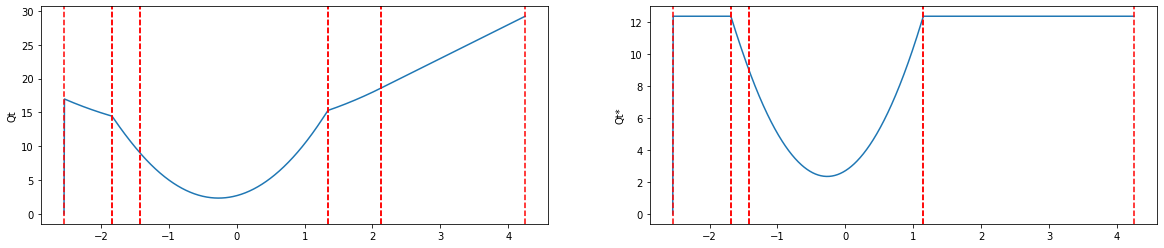

 21%|██        | 5/24 [00:01<00:04,  4.38it/s]

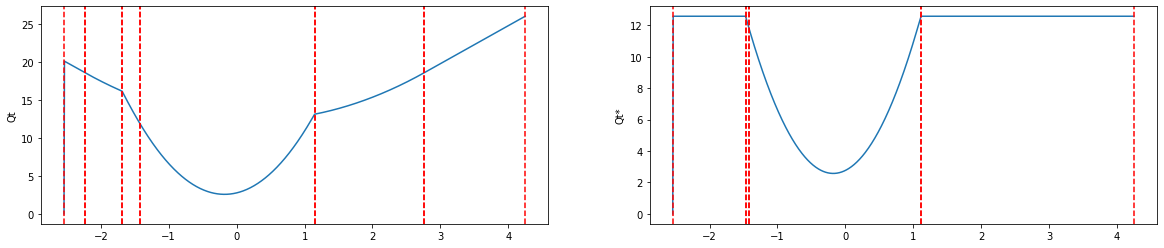

 25%|██▌       | 6/24 [00:01<00:03,  4.50it/s]

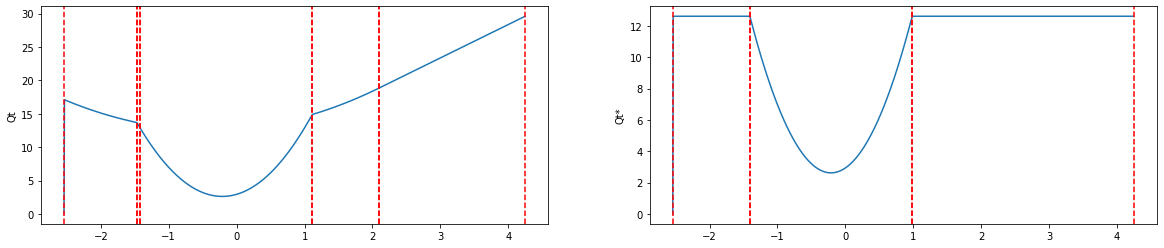

 29%|██▉       | 7/24 [00:01<00:04,  3.87it/s]

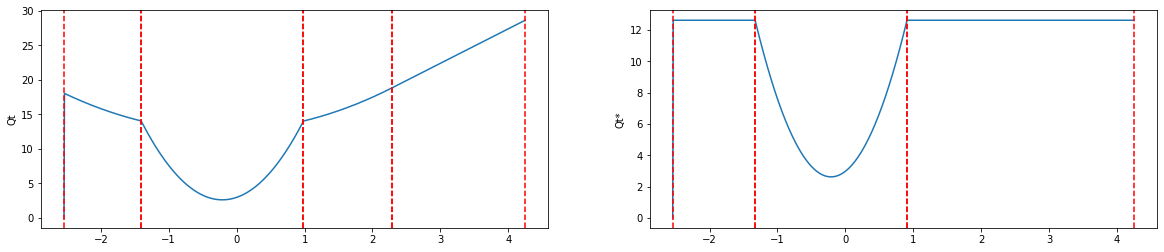

 33%|███▎      | 8/24 [00:01<00:04,  3.80it/s]

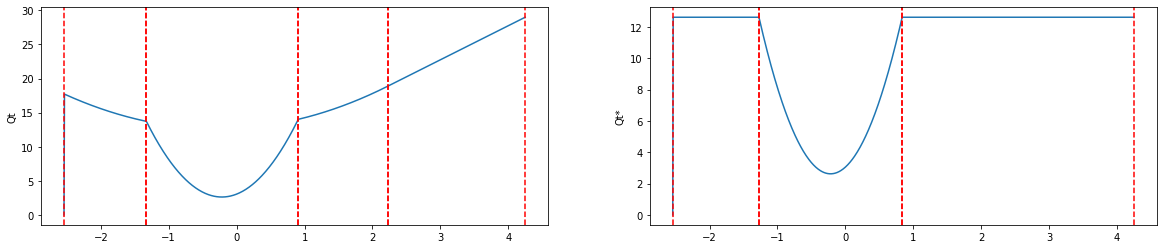

 38%|███▊      | 9/24 [00:02<00:03,  3.94it/s]

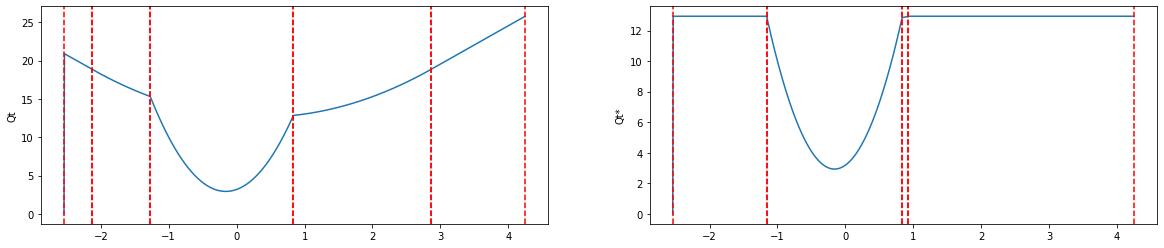

 42%|████▏     | 10/24 [00:02<00:03,  4.06it/s]

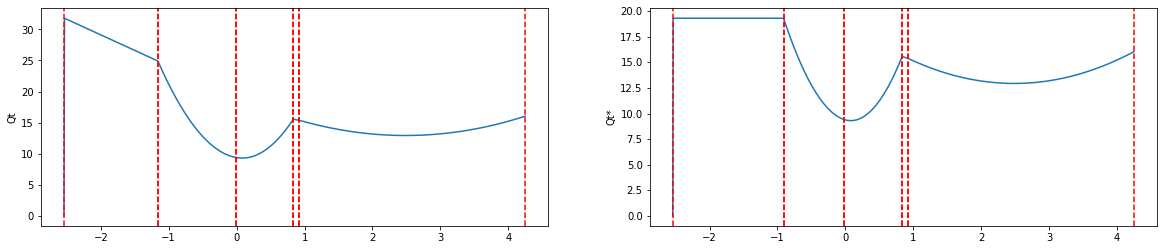

 46%|████▌     | 11/24 [00:02<00:03,  4.07it/s]

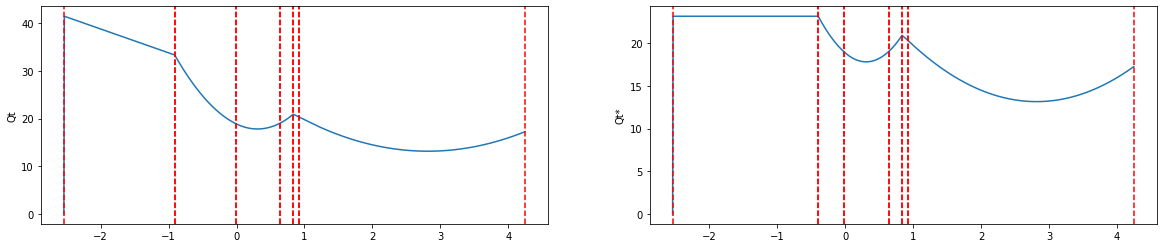

 50%|█████     | 12/24 [00:02<00:02,  4.18it/s]

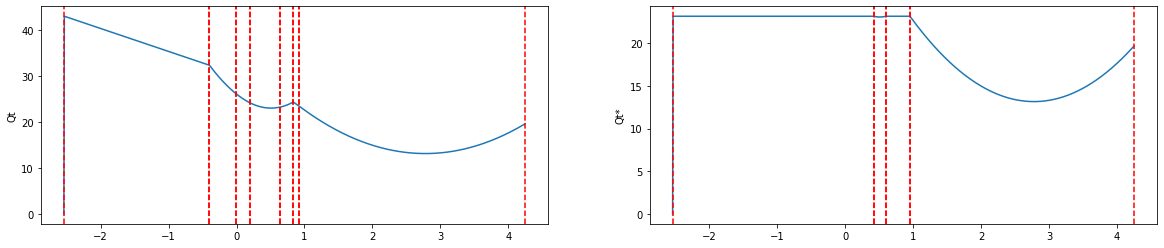

 54%|█████▍    | 13/24 [00:03<00:02,  4.30it/s]

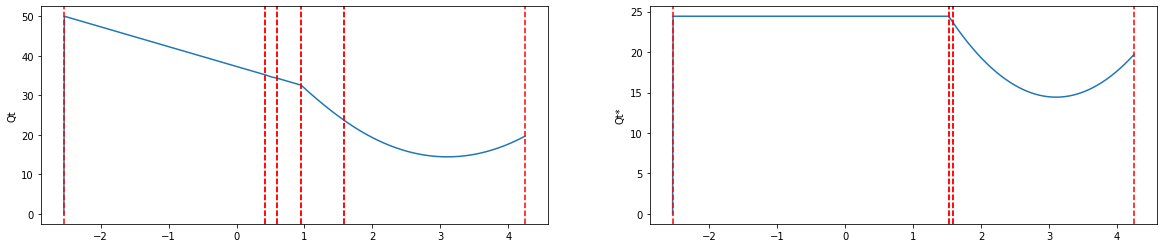

 58%|█████▊    | 14/24 [00:03<00:02,  4.13it/s]

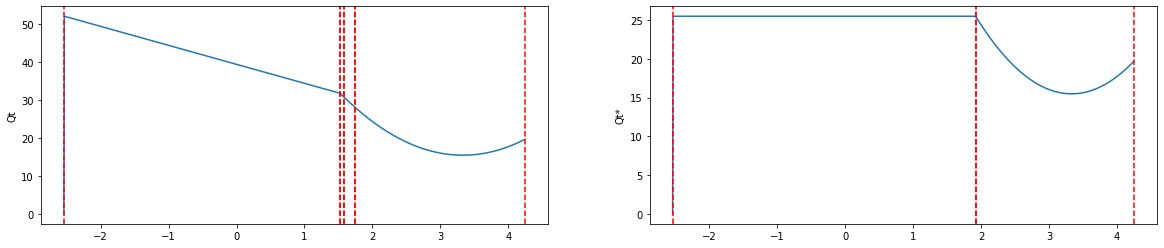

 62%|██████▎   | 15/24 [00:03<00:02,  4.21it/s]

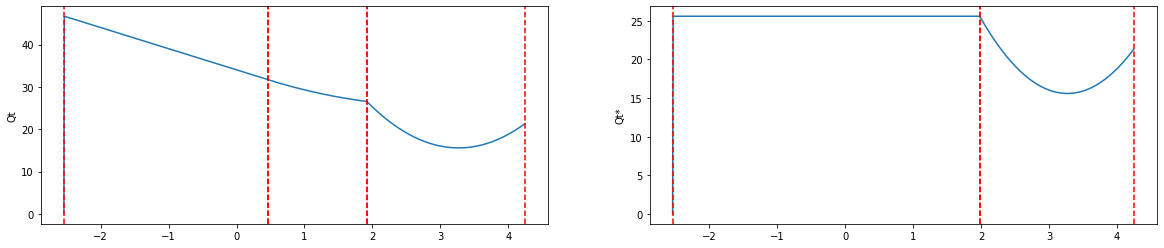

 67%|██████▋   | 16/24 [00:03<00:02,  3.71it/s]

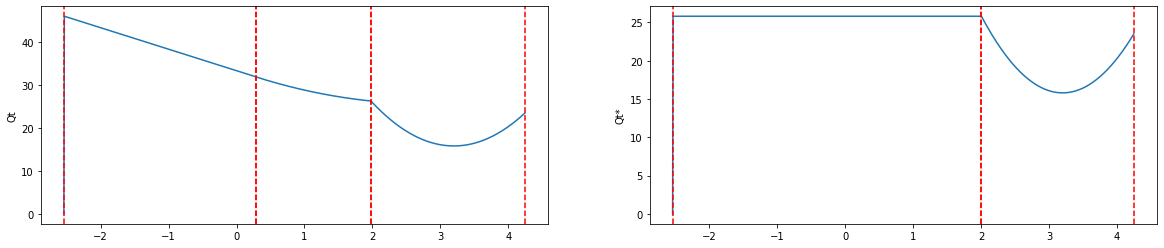

 71%|███████   | 17/24 [00:04<00:01,  3.93it/s]

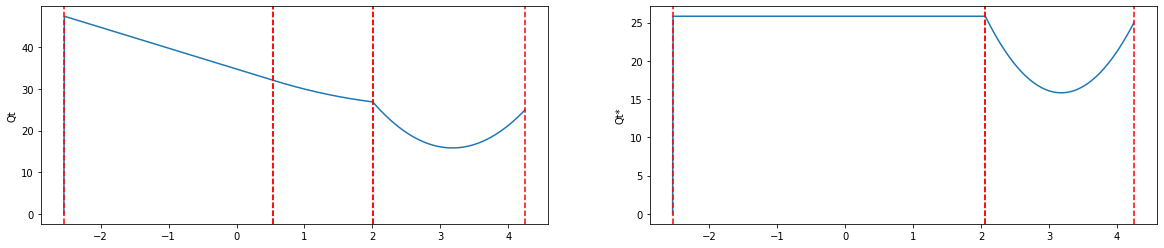

 75%|███████▌  | 18/24 [00:04<00:01,  4.07it/s]

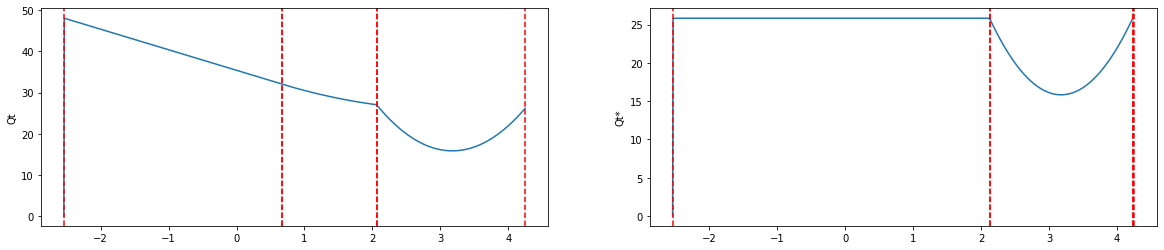

 79%|███████▉  | 19/24 [00:04<00:01,  4.18it/s]

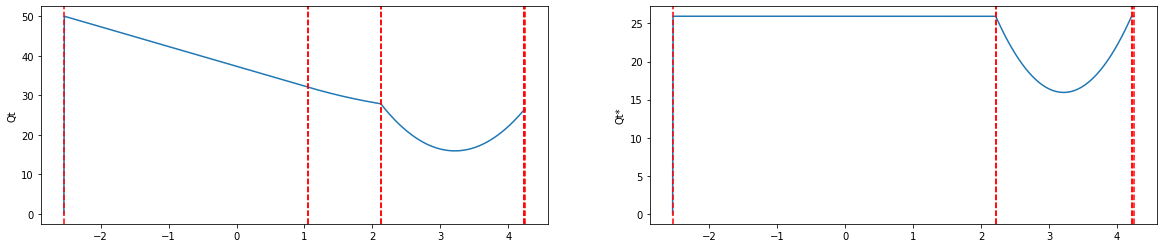

 83%|████████▎ | 20/24 [00:04<00:00,  4.02it/s]

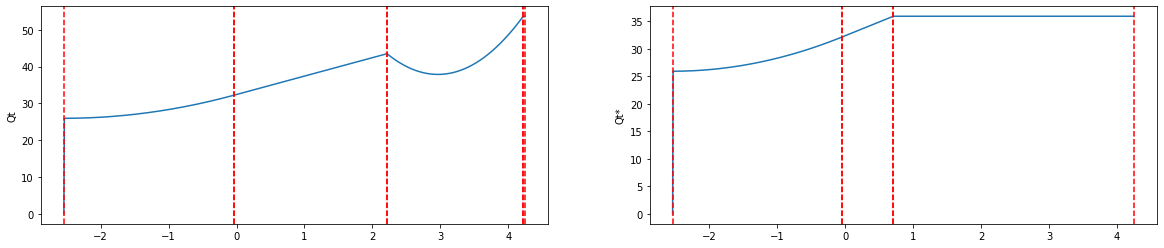

 88%|████████▊ | 21/24 [00:05<00:00,  4.09it/s]

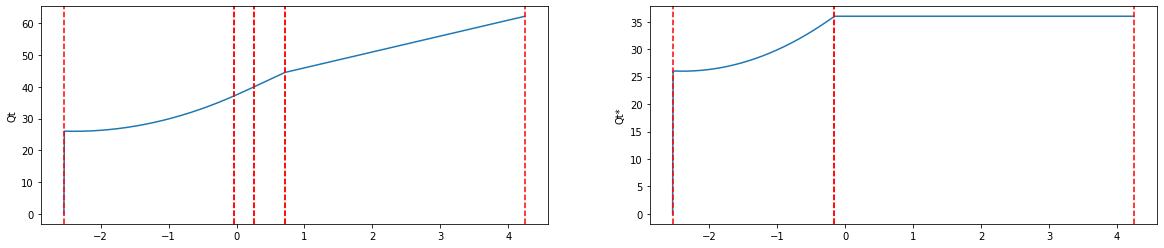

 92%|█████████▏| 22/24 [00:05<00:00,  4.13it/s]

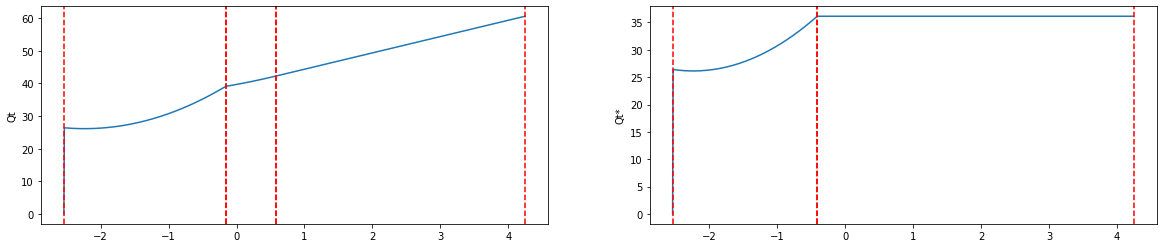

 96%|█████████▌| 23/24 [00:05<00:00,  4.18it/s]

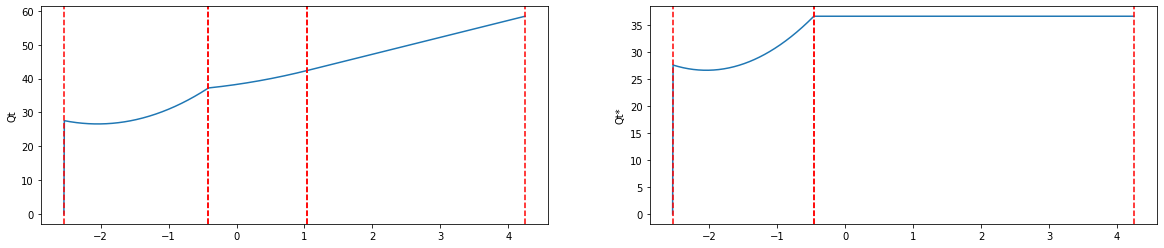

100%|██████████| 24/24 [00:05<00:00,  4.13it/s]


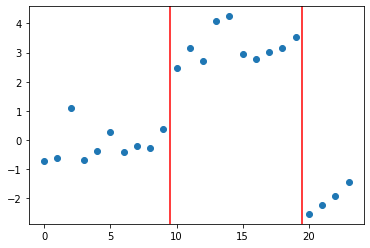

In [14]:
y1 = np.zeros(10)
y2 = 3+np.zeros(10)
y3 = -2+np.zeros(4)
y = np.concatenate((y1, y2, y3))
y += np.random.normal(0, 0.5, len(y))

K = 2.5
loss = Huber(0, 2.5, 0, 0)

cp = rfpop(y, loss, 10, verbose=True)
taus = [elt[1] for elt in cp]

plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

  0%|          | 0/24 [00:00<?, ?it/s]

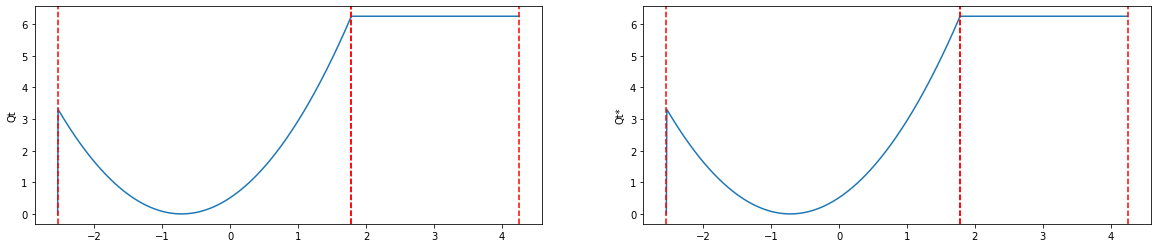

  4%|▍         | 1/24 [00:00<00:07,  3.16it/s]

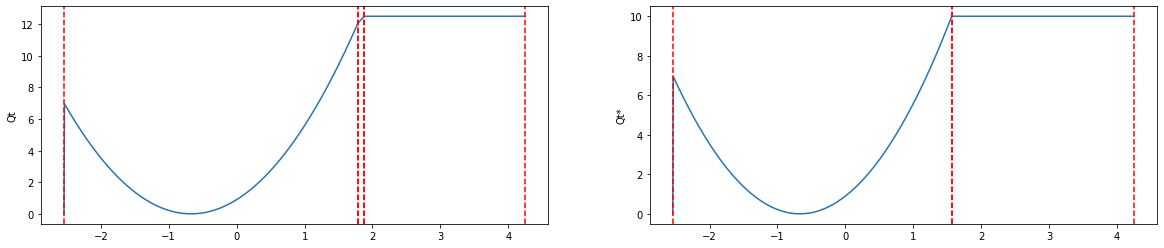

  8%|▊         | 2/24 [00:00<00:05,  4.01it/s]

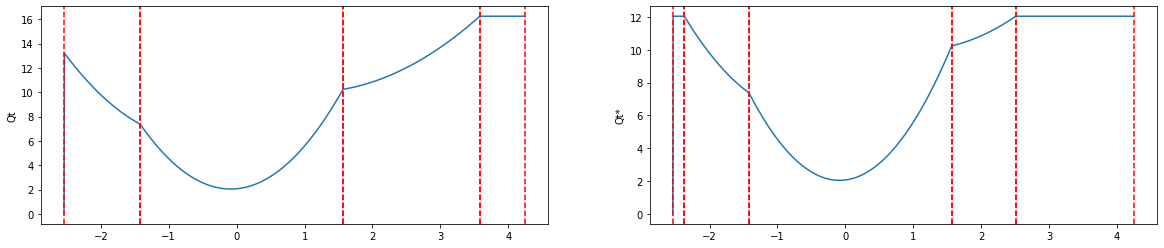

 12%|█▎        | 3/24 [00:00<00:04,  4.26it/s]

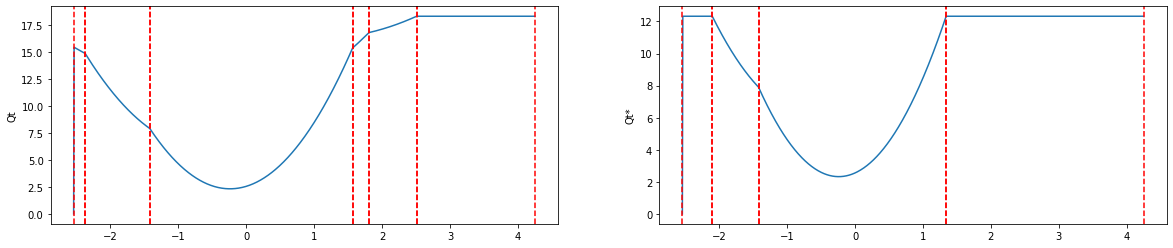

 17%|█▋        | 4/24 [00:00<00:04,  4.37it/s]

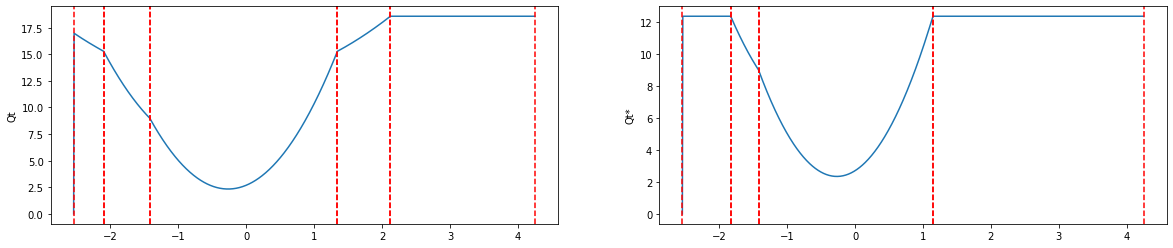

 21%|██        | 5/24 [00:01<00:04,  4.07it/s]

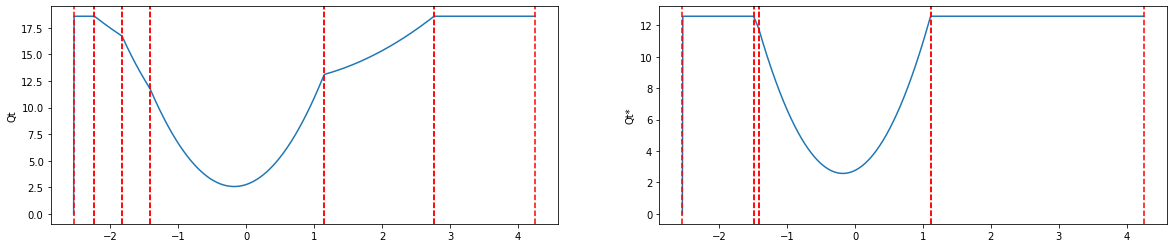

 25%|██▌       | 6/24 [00:01<00:04,  4.12it/s]

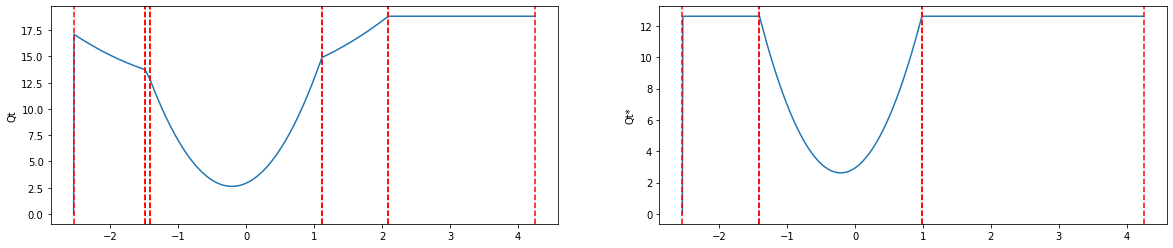

 29%|██▉       | 7/24 [00:01<00:04,  4.16it/s]

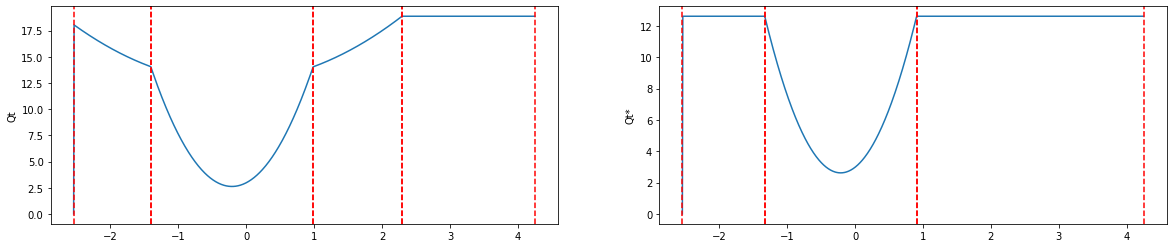

 33%|███▎      | 8/24 [00:01<00:03,  4.17it/s]

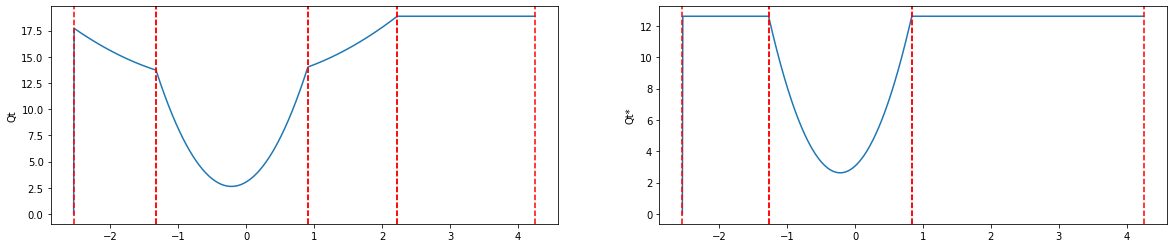

 38%|███▊      | 9/24 [00:02<00:04,  3.63it/s]

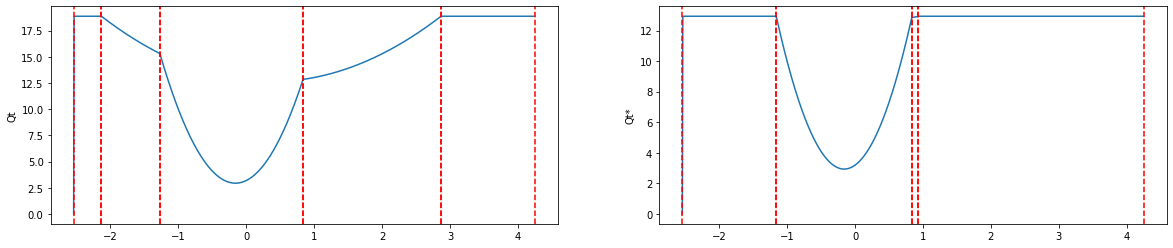

 42%|████▏     | 10/24 [00:02<00:03,  3.78it/s]

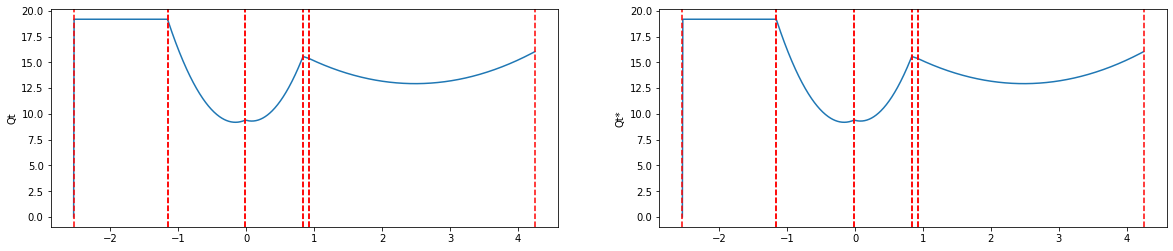

 46%|████▌     | 11/24 [00:02<00:03,  3.83it/s]

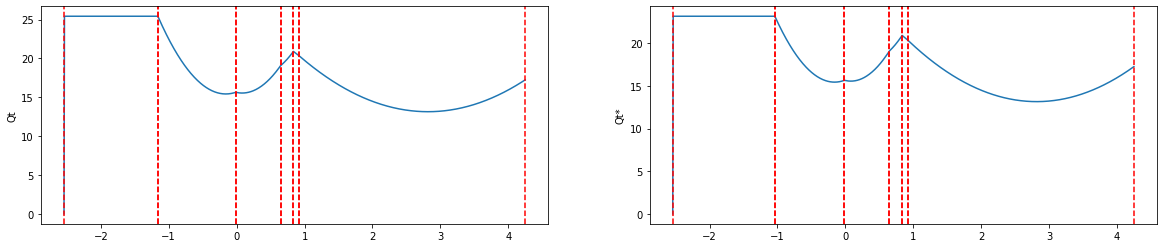

 50%|█████     | 12/24 [00:03<00:03,  3.79it/s]

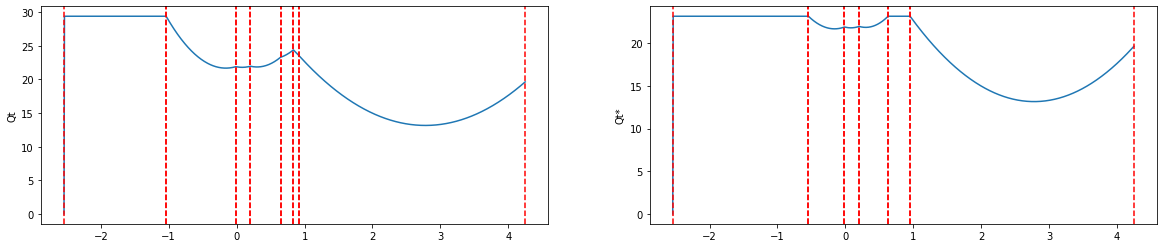

 54%|█████▍    | 13/24 [00:03<00:02,  3.94it/s]

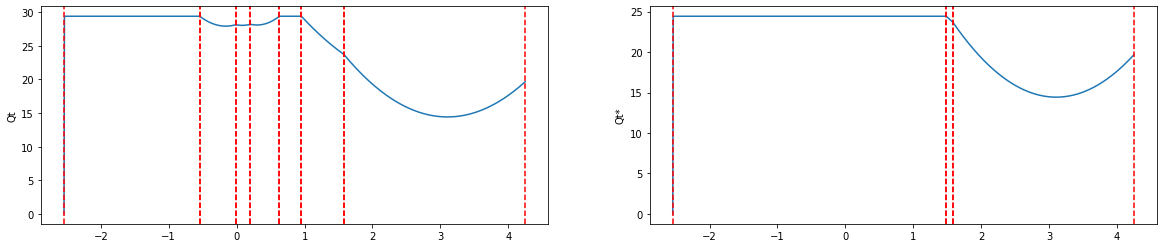

 58%|█████▊    | 14/24 [00:03<00:02,  4.06it/s]

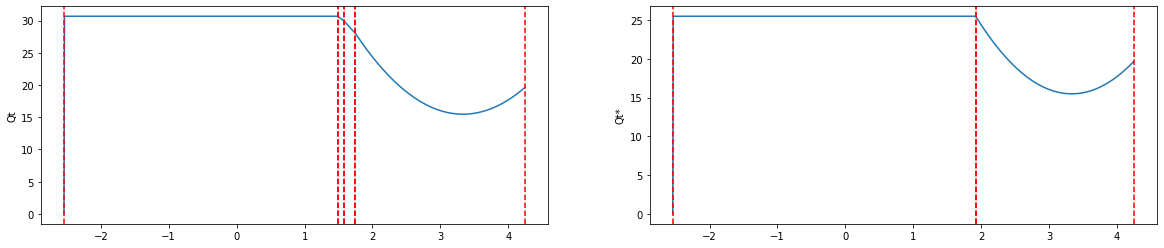

 62%|██████▎   | 15/24 [00:03<00:02,  4.12it/s]

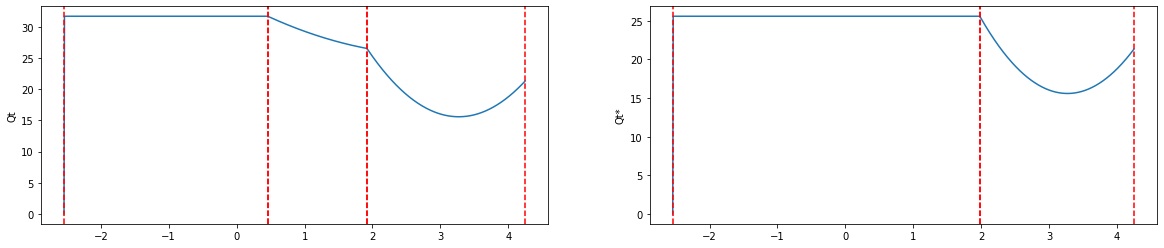

 67%|██████▋   | 16/24 [00:03<00:01,  4.24it/s]

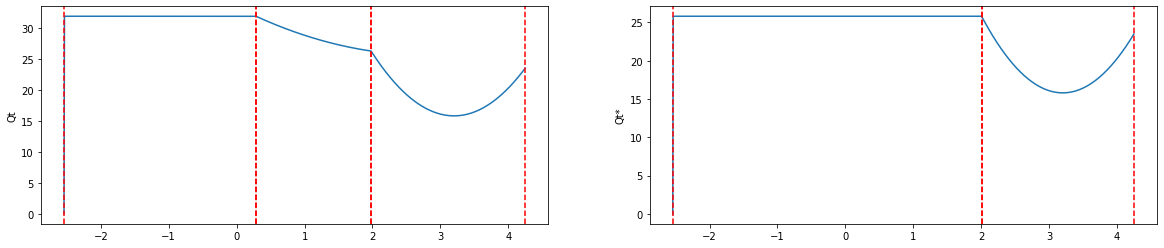

 71%|███████   | 17/24 [00:04<00:01,  4.23it/s]

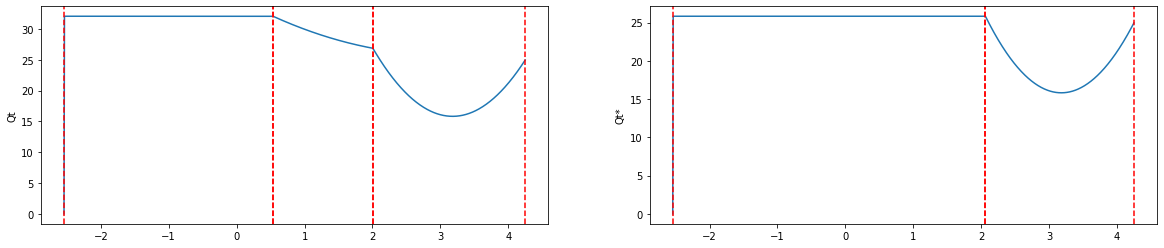

 75%|███████▌  | 18/24 [00:04<00:01,  3.50it/s]

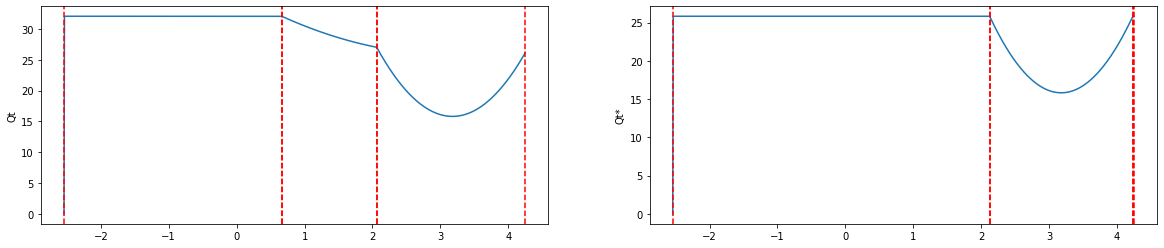

 79%|███████▉  | 19/24 [00:04<00:01,  3.75it/s]

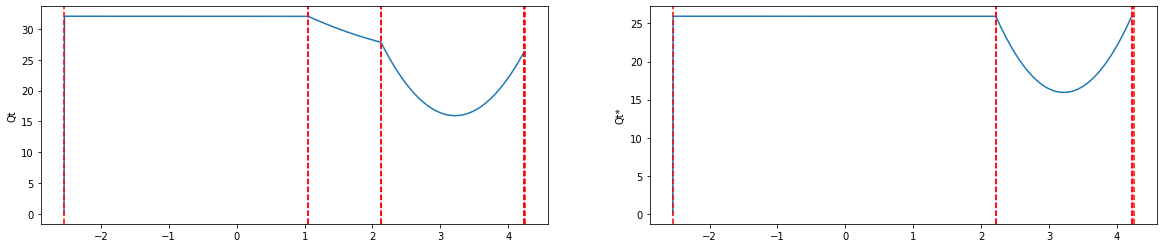

 83%|████████▎ | 20/24 [00:05<00:01,  3.90it/s]

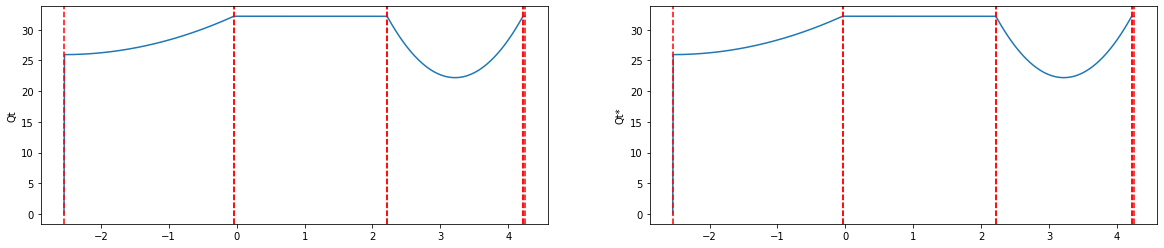

 88%|████████▊ | 21/24 [00:05<00:00,  3.98it/s]

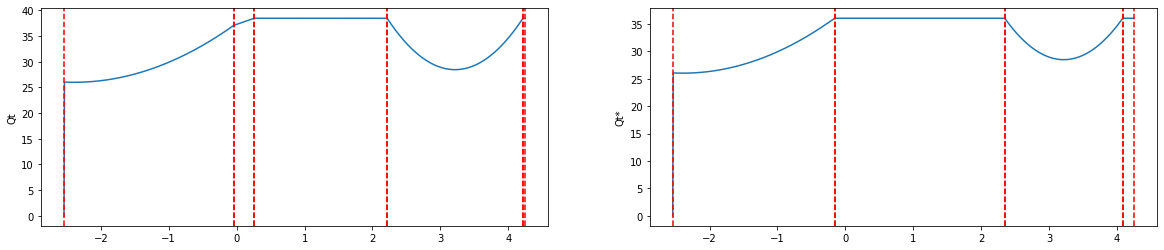

 92%|█████████▏| 22/24 [00:05<00:00,  4.03it/s]

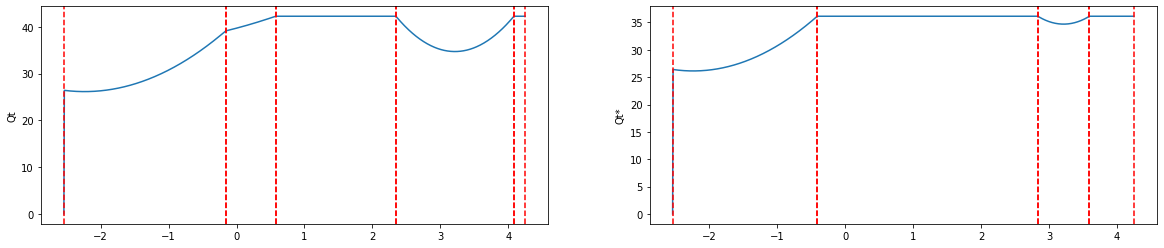

 96%|█████████▌| 23/24 [00:05<00:00,  4.10it/s]

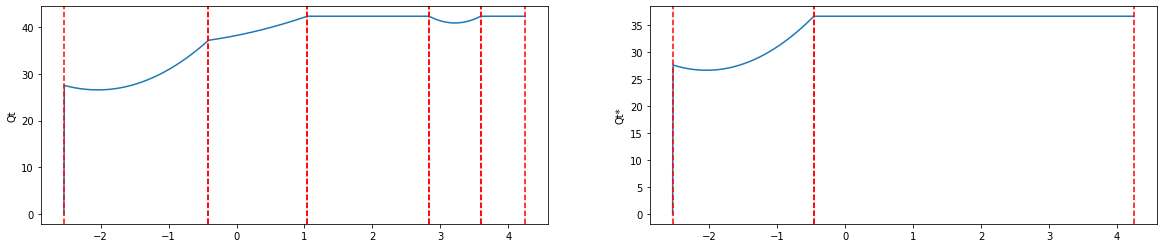

100%|██████████| 24/24 [00:06<00:00,  3.97it/s]


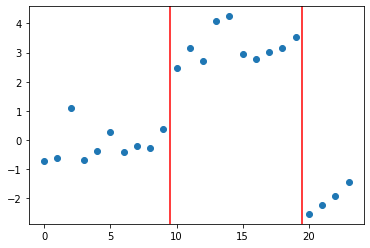

In [15]:
K = 2.5
loss = BiWeight(0, 2.5, 0, 0)

cp = rfpop(y, loss, 10, verbose=True)
taus = [elt[1] for elt in cp]

plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

  0%|          | 0/24 [00:00<?, ?it/s]

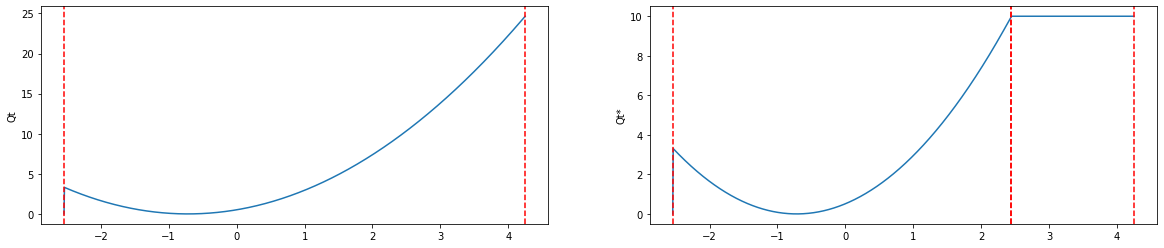

  4%|▍         | 1/24 [00:00<00:05,  4.13it/s]

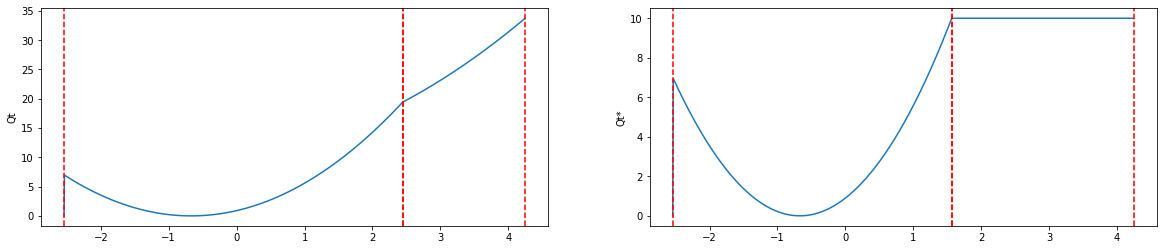

  8%|▊         | 2/24 [00:00<00:04,  4.56it/s]

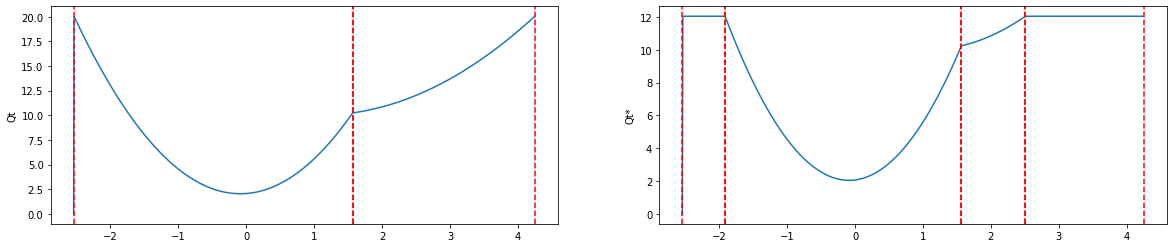

 12%|█▎        | 3/24 [00:00<00:05,  3.69it/s]

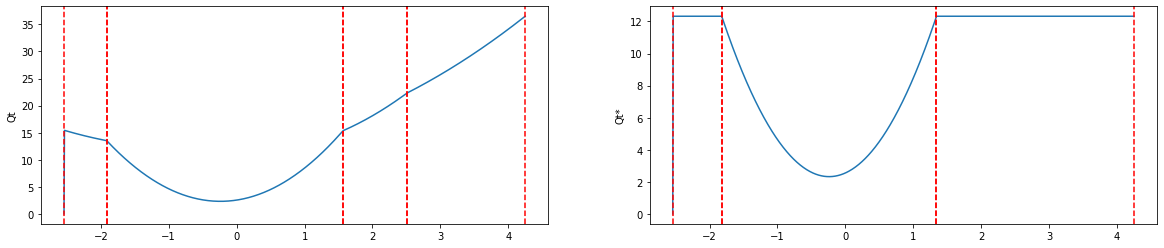

 17%|█▋        | 4/24 [00:01<00:05,  3.95it/s]

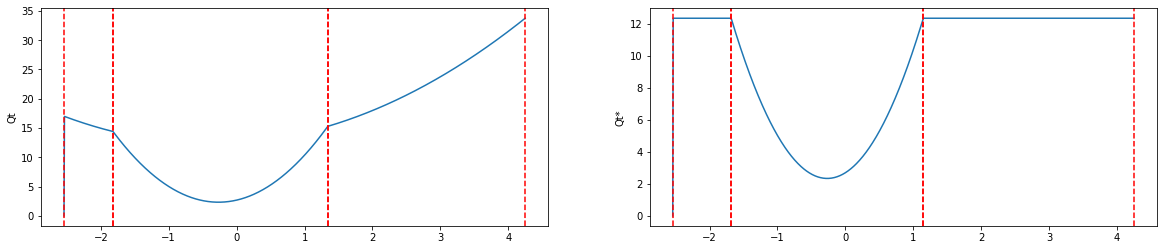

 21%|██        | 5/24 [00:01<00:04,  4.04it/s]

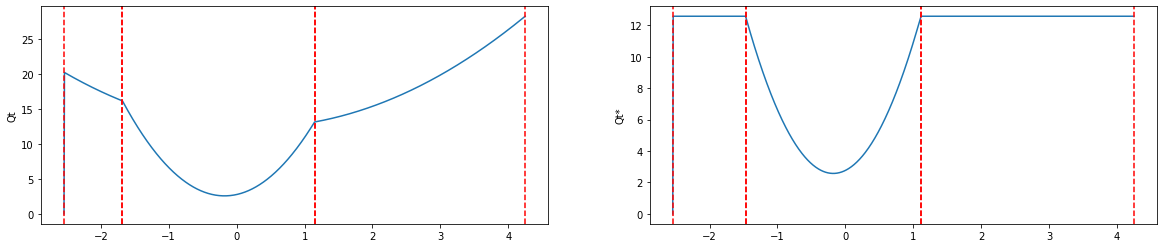

 25%|██▌       | 6/24 [00:01<00:04,  4.15it/s]

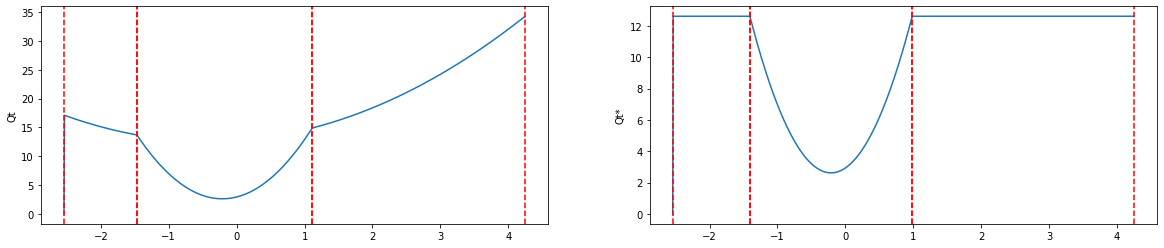

 29%|██▉       | 7/24 [00:01<00:04,  4.00it/s]

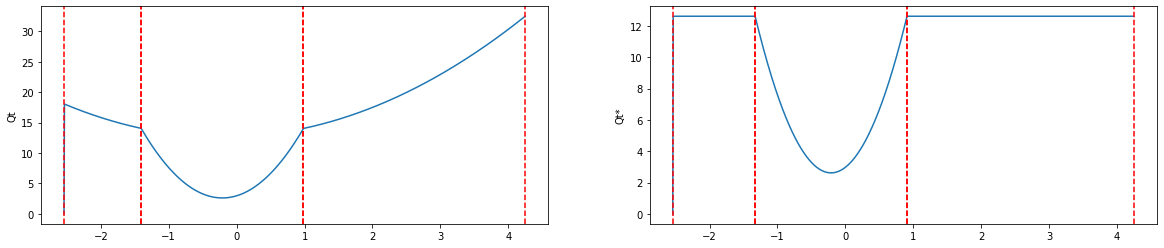

 33%|███▎      | 8/24 [00:01<00:03,  4.07it/s]

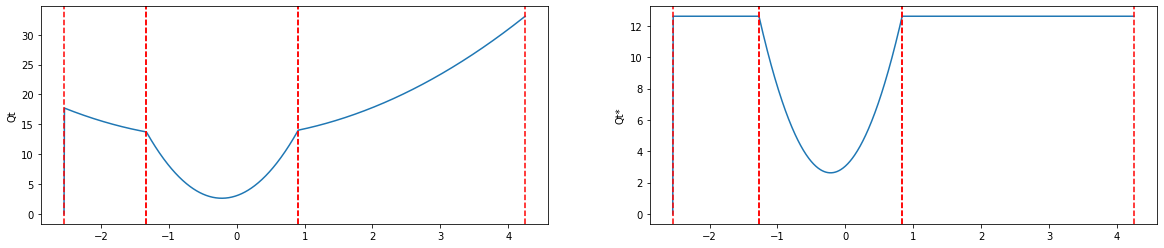

 38%|███▊      | 9/24 [00:02<00:03,  4.14it/s]

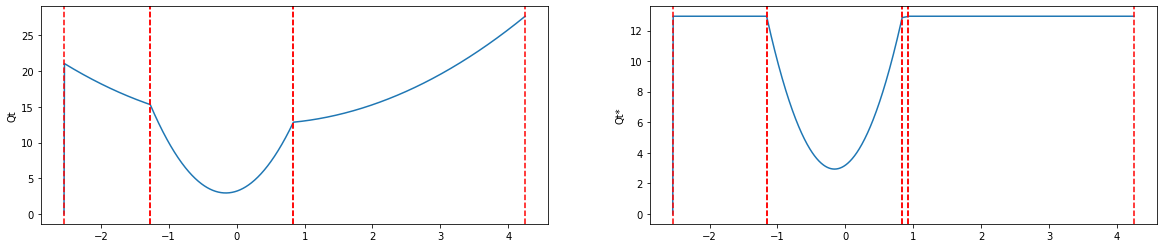

 42%|████▏     | 10/24 [00:02<00:03,  4.19it/s]

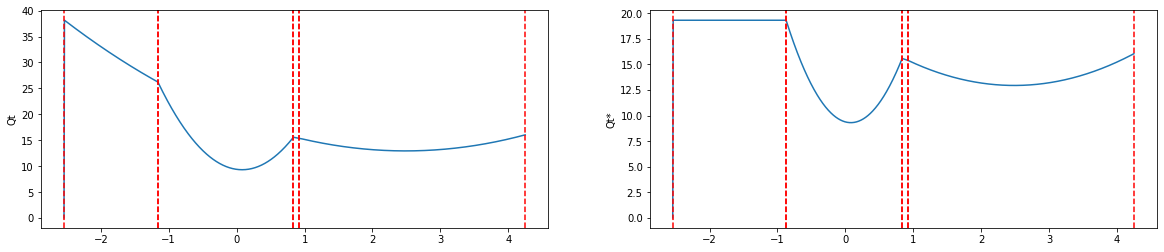

 46%|████▌     | 11/24 [00:02<00:03,  4.17it/s]

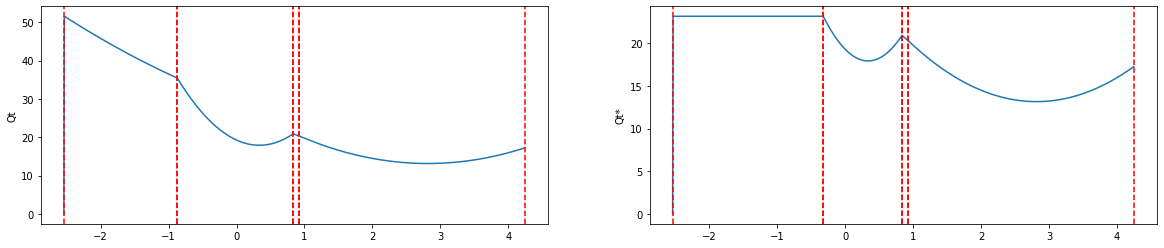

 50%|█████     | 12/24 [00:03<00:03,  3.67it/s]

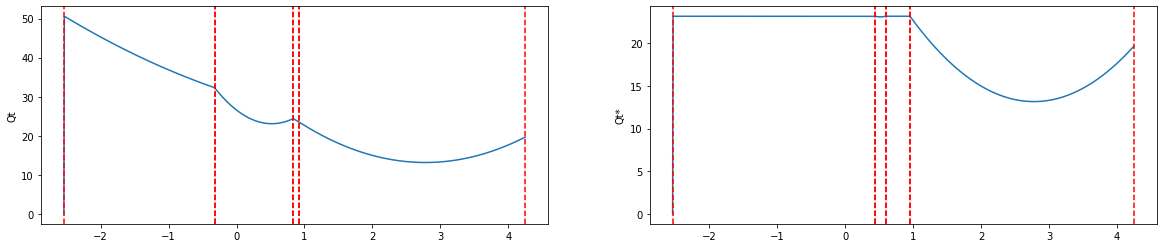

 54%|█████▍    | 13/24 [00:03<00:02,  3.76it/s]

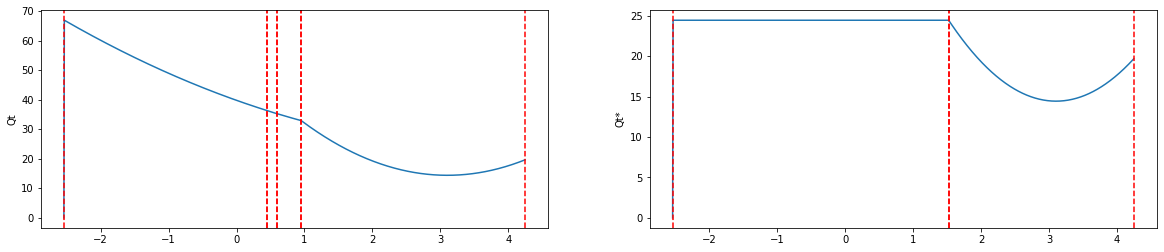

 58%|█████▊    | 14/24 [00:03<00:02,  3.93it/s]

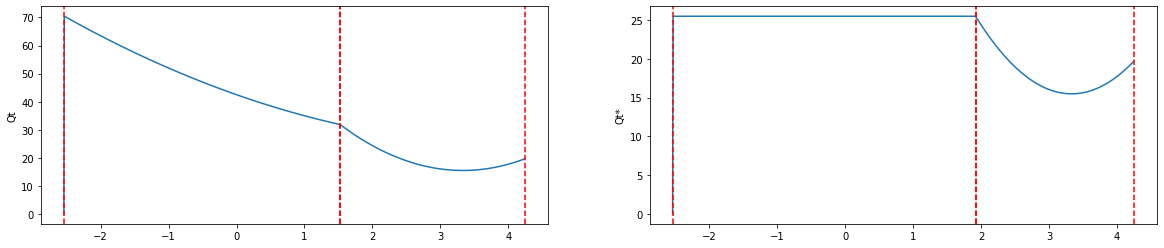

 62%|██████▎   | 15/24 [00:03<00:02,  4.05it/s]

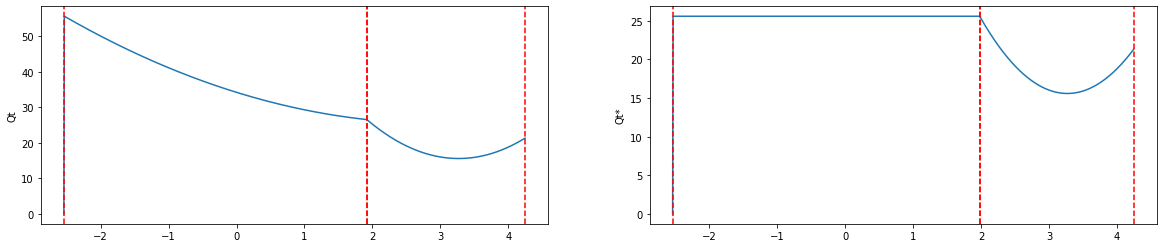

 67%|██████▋   | 16/24 [00:03<00:01,  4.16it/s]

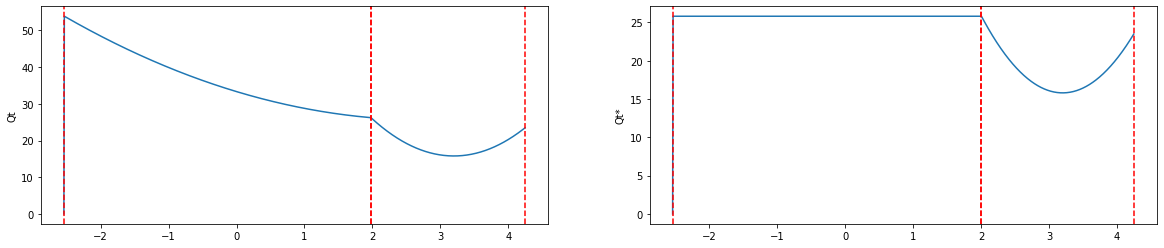

 71%|███████   | 17/24 [00:04<00:01,  4.26it/s]

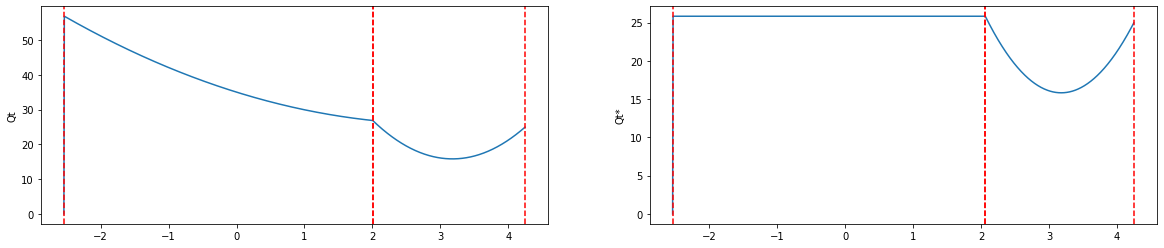

 75%|███████▌  | 18/24 [00:04<00:01,  4.34it/s]

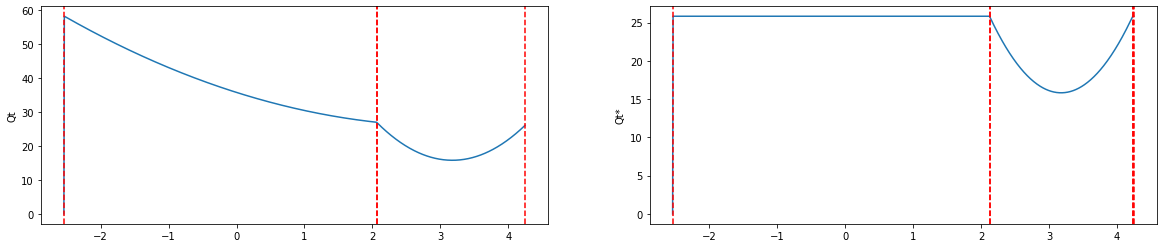

 79%|███████▉  | 19/24 [00:04<00:01,  4.15it/s]

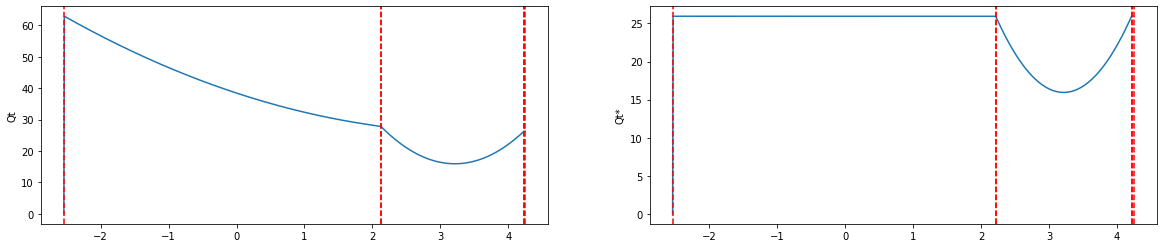

 83%|████████▎ | 20/24 [00:04<00:00,  4.19it/s]

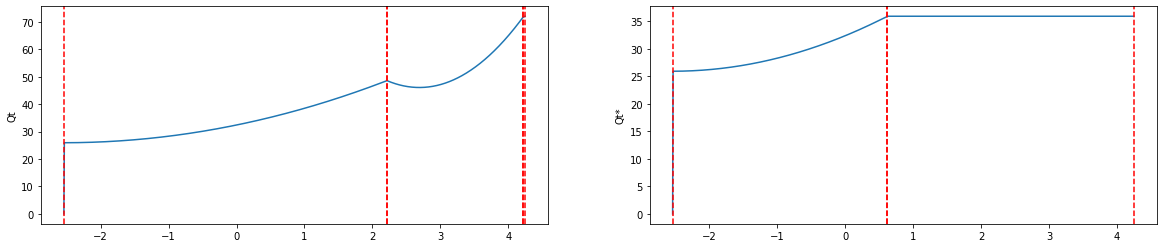

 88%|████████▊ | 21/24 [00:05<00:00,  3.57it/s]

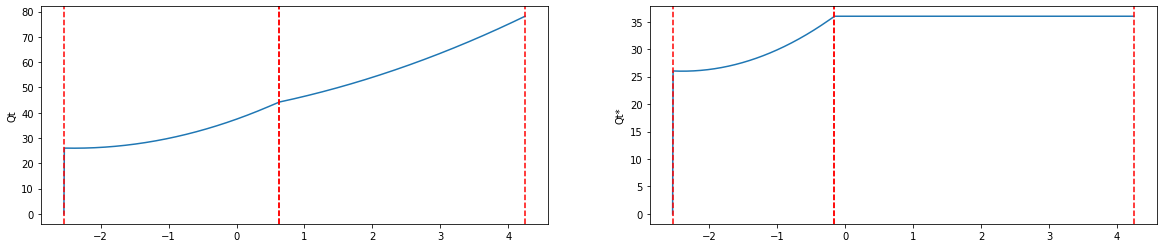

 92%|█████████▏| 22/24 [00:05<00:00,  3.74it/s]

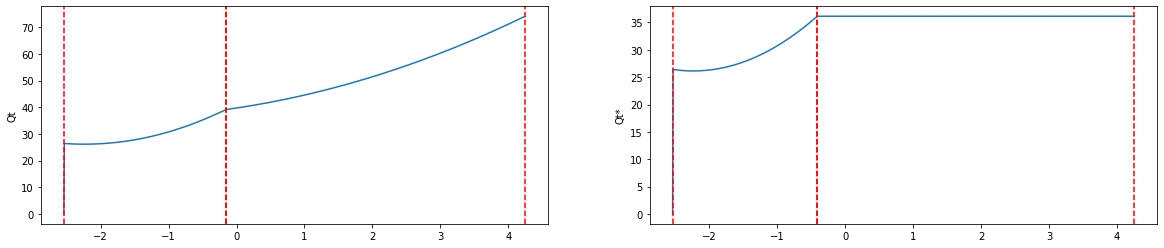

 96%|█████████▌| 23/24 [00:05<00:00,  3.87it/s]

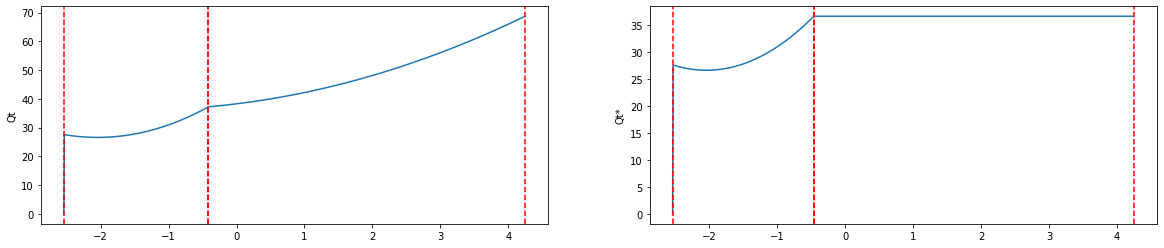

100%|██████████| 24/24 [00:06<00:00,  3.98it/s]


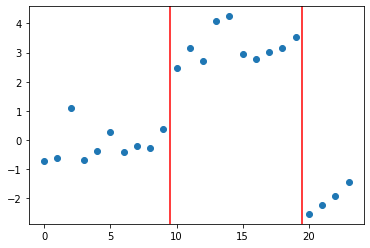

In [16]:
K = 2.5
loss = L2Loss(0, 0, 0)

cp = rfpop(y, loss, 10, verbose=True)
taus = [elt[1] for elt in cp]

plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

  0%|          | 0/24 [00:00<?, ?it/s]

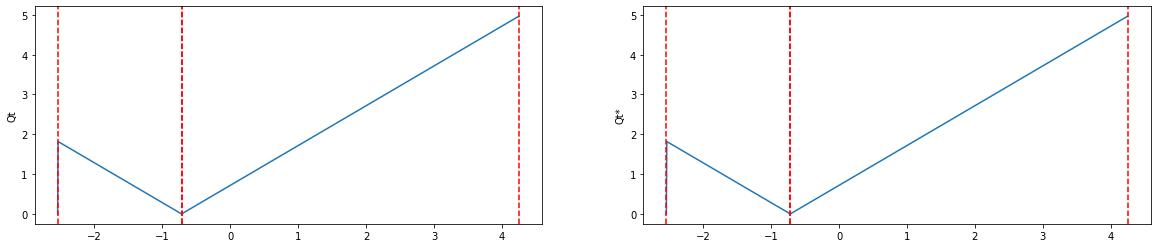

  4%|▍         | 1/24 [00:00<00:05,  4.01it/s]

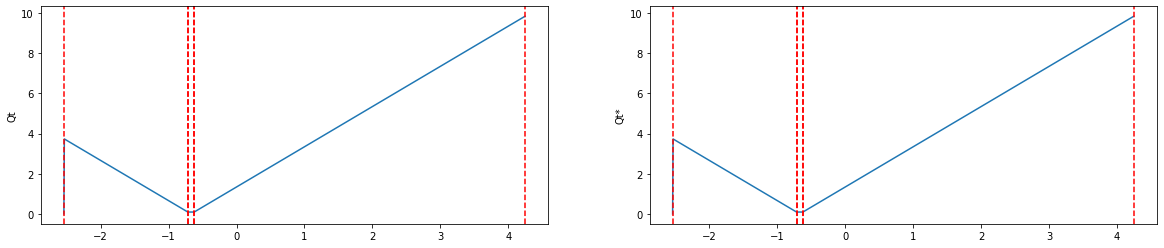

  8%|▊         | 2/24 [00:00<00:04,  4.49it/s]

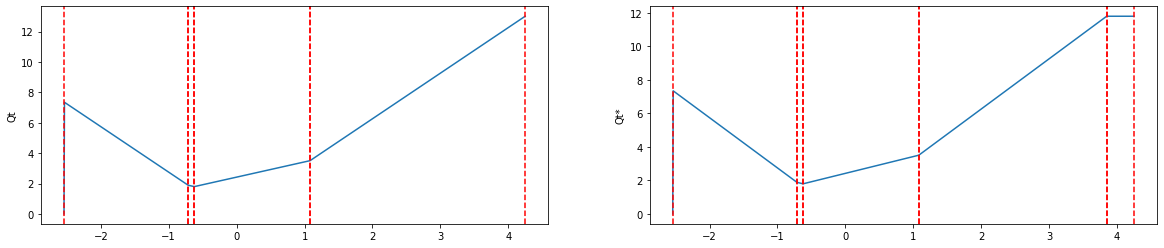

 12%|█▎        | 3/24 [00:00<00:04,  4.46it/s]

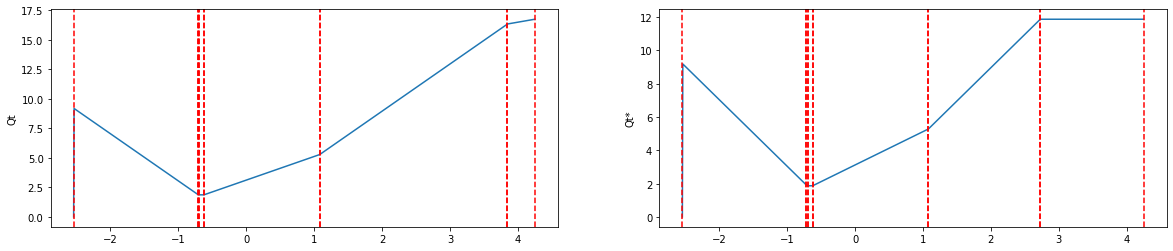

 17%|█▋        | 4/24 [00:00<00:04,  4.31it/s]

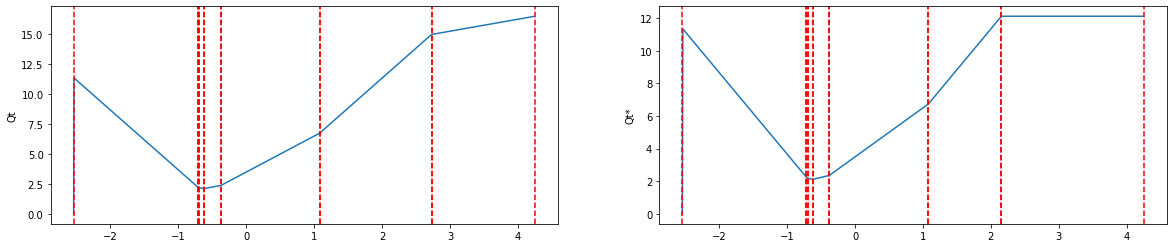

 21%|██        | 5/24 [00:01<00:05,  3.56it/s]

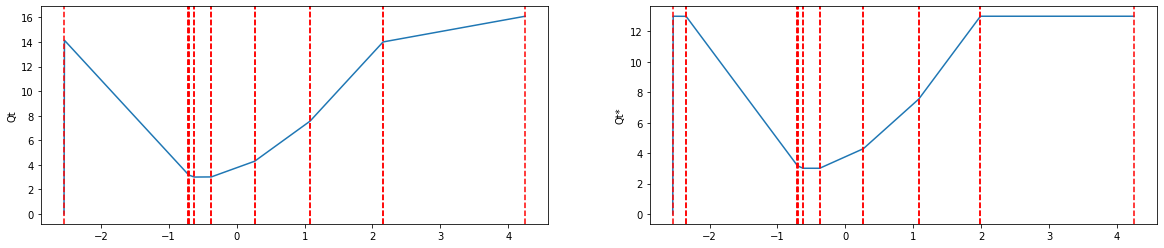

 25%|██▌       | 6/24 [00:01<00:04,  3.70it/s]

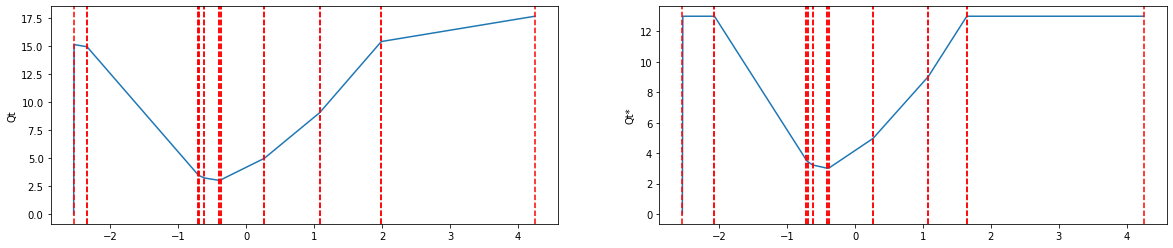

 29%|██▉       | 7/24 [00:01<00:04,  3.57it/s]

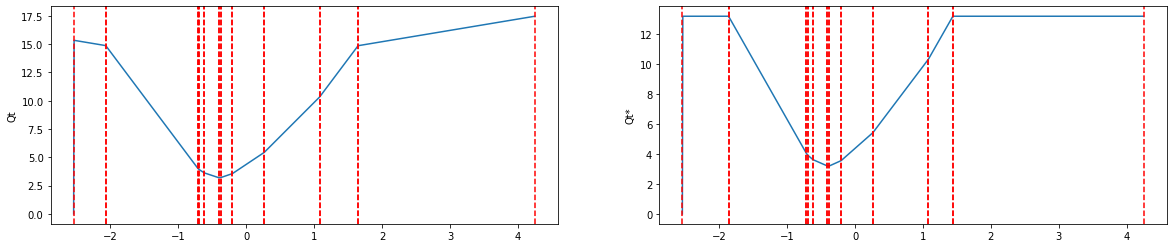

 33%|███▎      | 8/24 [00:02<00:04,  3.68it/s]

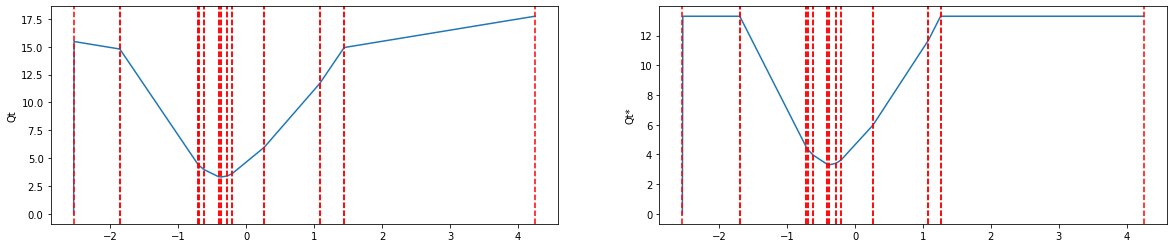

 38%|███▊      | 9/24 [00:02<00:04,  3.69it/s]

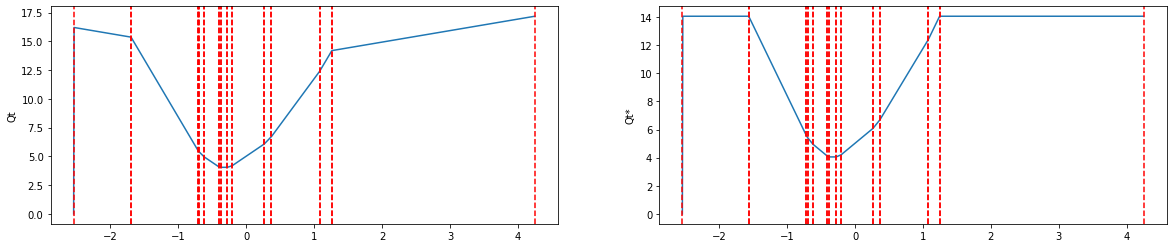

 42%|████▏     | 10/24 [00:02<00:03,  3.76it/s]

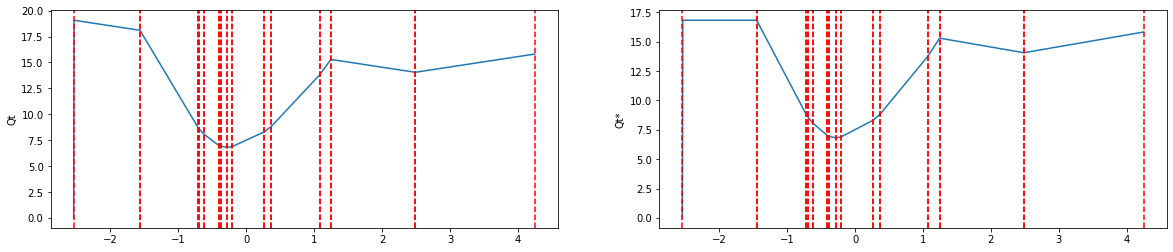

 46%|████▌     | 11/24 [00:02<00:03,  3.76it/s]

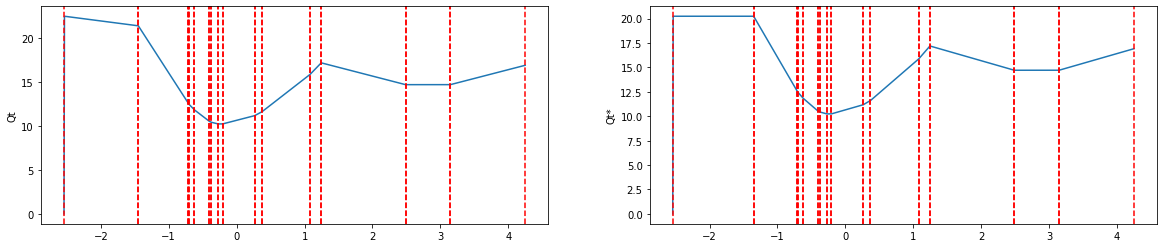

 50%|█████     | 12/24 [00:03<00:03,  3.27it/s]

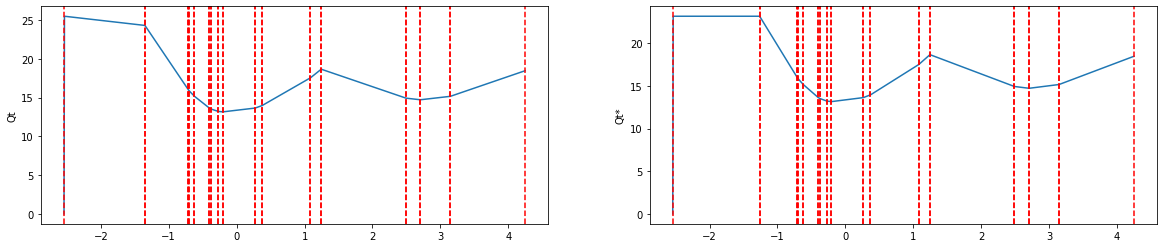

 54%|█████▍    | 13/24 [00:03<00:03,  3.41it/s]

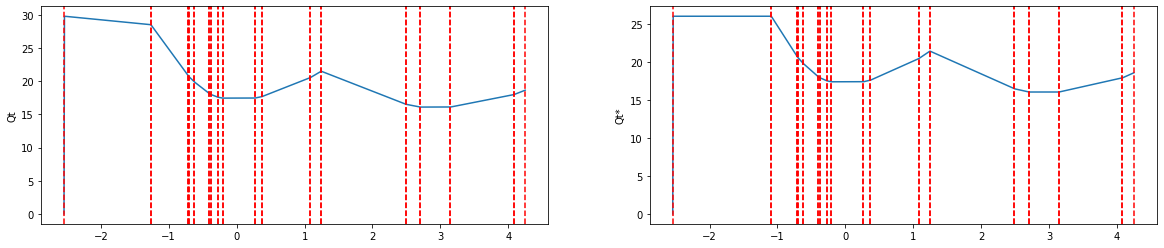

 58%|█████▊    | 14/24 [00:03<00:03,  3.31it/s]

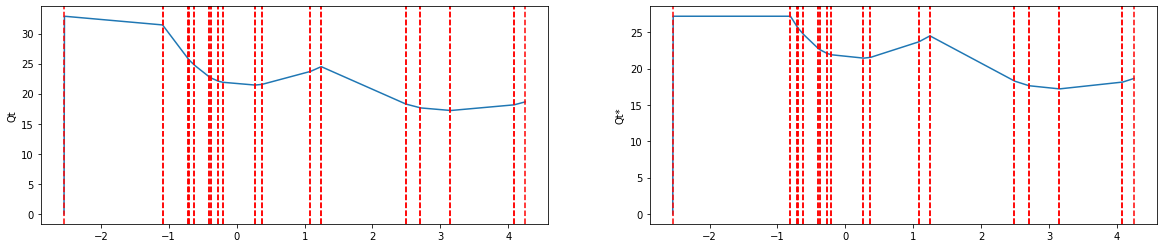

 62%|██████▎   | 15/24 [00:04<00:02,  3.36it/s]

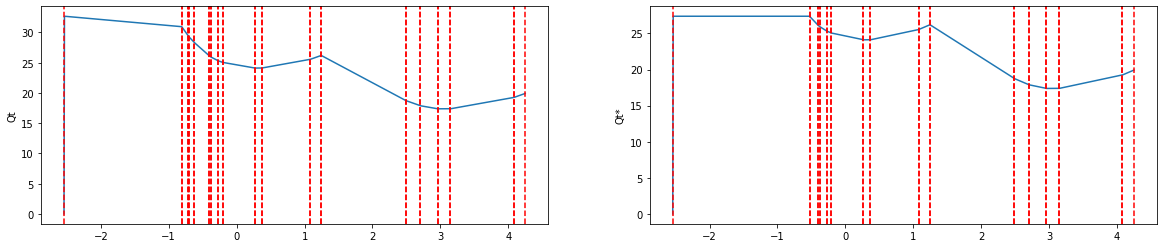

 67%|██████▋   | 16/24 [00:04<00:02,  3.43it/s]

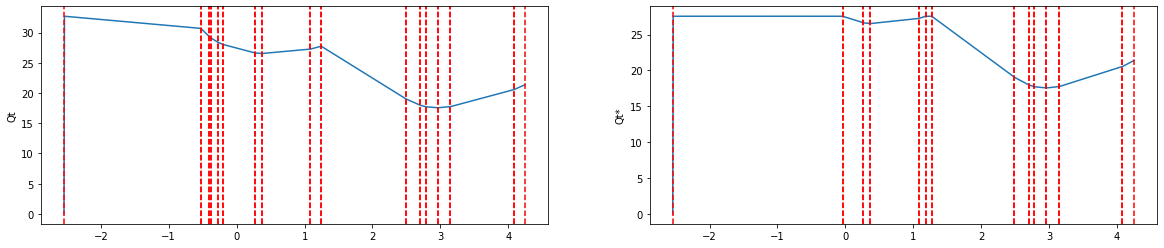

 71%|███████   | 17/24 [00:04<00:01,  3.61it/s]

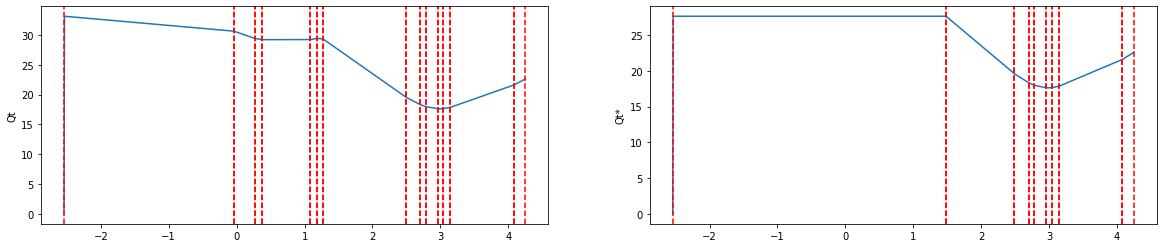

 75%|███████▌  | 18/24 [00:04<00:01,  3.75it/s]

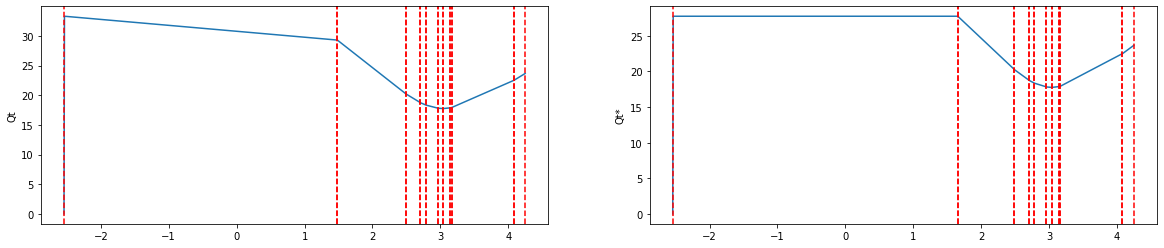

 79%|███████▉  | 19/24 [00:05<00:01,  3.16it/s]

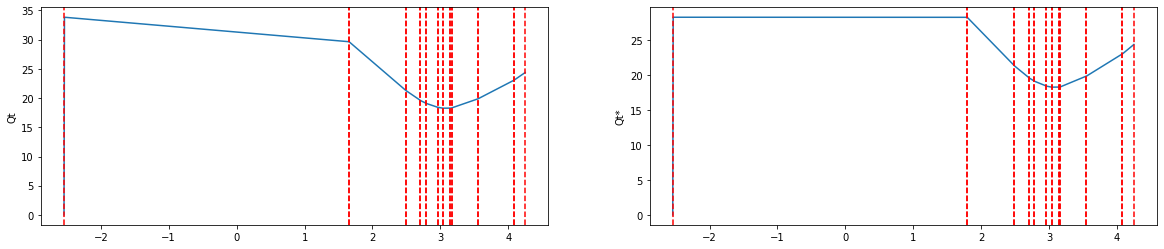

 83%|████████▎ | 20/24 [00:05<00:01,  3.29it/s]

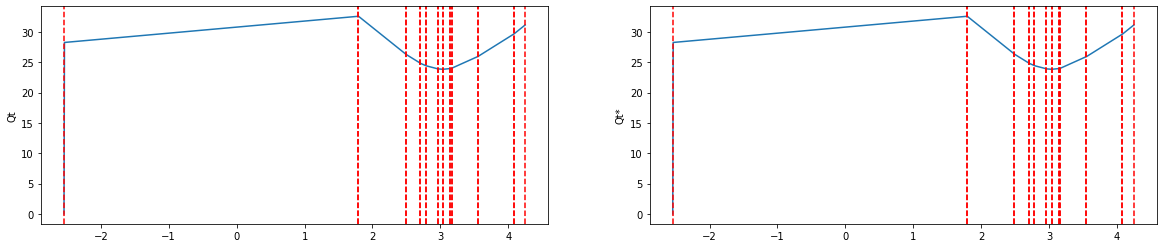

 88%|████████▊ | 21/24 [00:05<00:00,  3.45it/s]

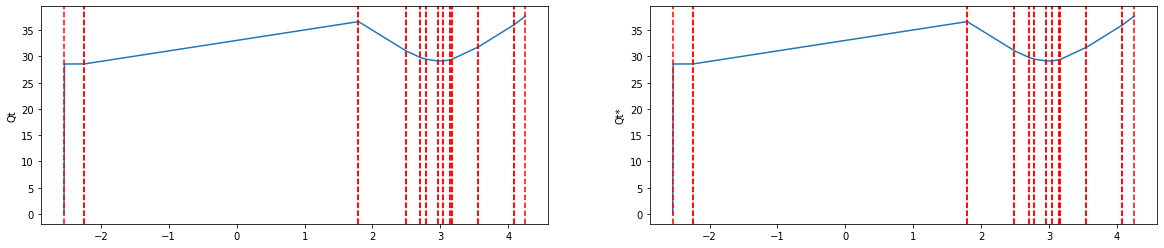

 92%|█████████▏| 22/24 [00:06<00:00,  3.42it/s]

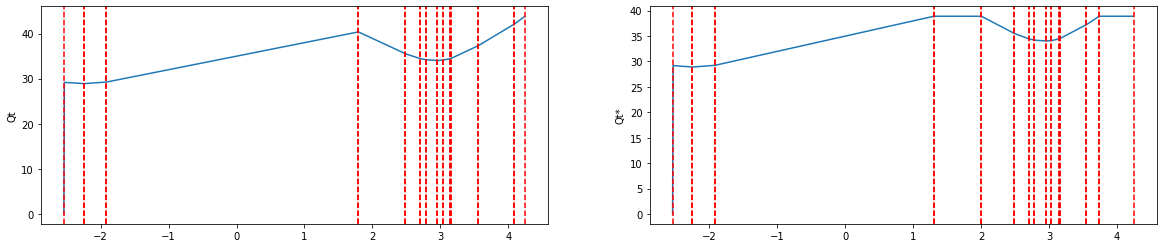

 96%|█████████▌| 23/24 [00:06<00:00,  3.54it/s]

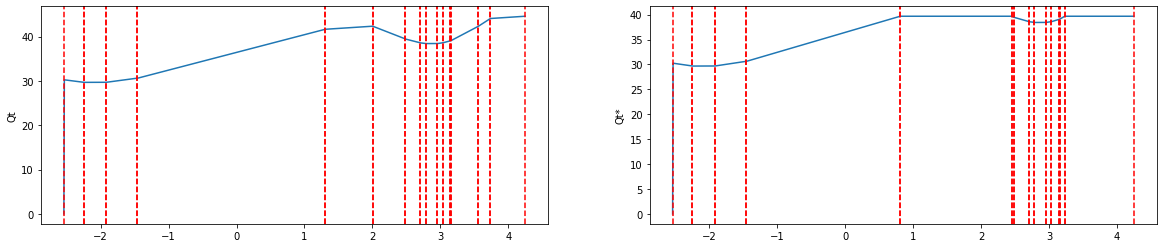

100%|██████████| 24/24 [00:06<00:00,  3.58it/s]


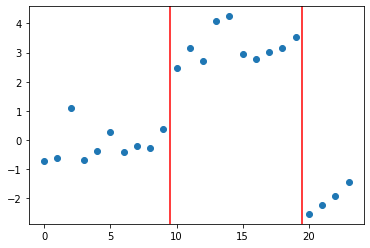

In [17]:
K = 2.5
loss = L1Loss(0, 0, 0)

cp = rfpop(y, loss, 10, verbose=True)
taus = [elt[1] for elt in cp]

plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

100%|██████████| 170/170 [00:00<00:00, 2116.66it/s]


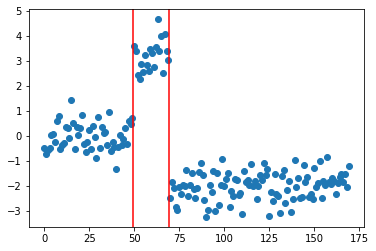

100%|██████████| 170/170 [00:00<00:00, 2266.41it/s]


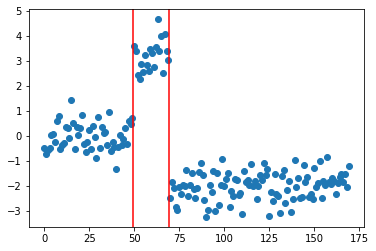

100%|██████████| 170/170 [00:00<00:00, 2799.96it/s]


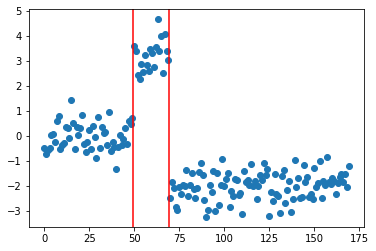

100%|██████████| 170/170 [00:00<00:00, 489.89it/s]


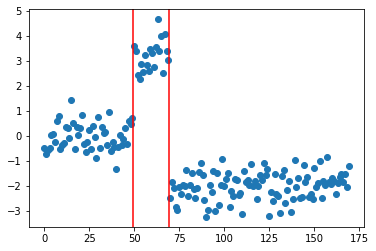

In [20]:
y1 = np.zeros(50)
y2 = 3+np.zeros(20)
y3 = -2+np.zeros(100)
y = np.concatenate((y1, y2, y3))
y += np.random.normal(0, 0.5, len(y))

loss = BiWeight(0, 2.5, 0, 0)
cp = rfpop(y, loss, 10)
taus = [elt[1] for elt in cp]
plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

loss = Huber(0, 2.5, 0, 0)
cp = rfpop(y, loss, 10)
taus = [elt[1] for elt in cp]
plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

loss = L2Loss(0, 0, 0)
cp = rfpop(y, loss, 10)
taus = [elt[1] for elt in cp]
plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

loss = L1Loss(0, 0, 0)
cp = rfpop(y, loss, 10)
taus = [elt[1] for elt in cp]
plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

100%|██████████| 450/450 [00:00<00:00, 2209.59it/s]


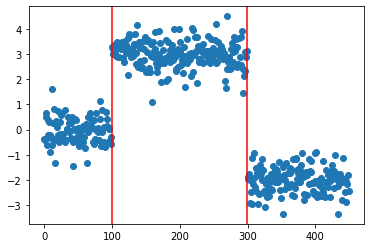

100%|██████████| 450/450 [00:00<00:00, 2184.25it/s]


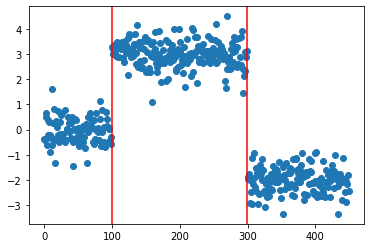

100%|██████████| 450/450 [00:00<00:00, 2660.20it/s]


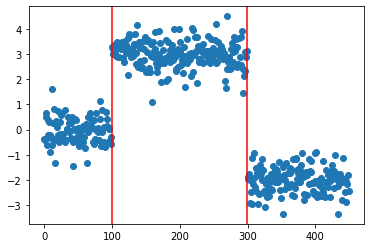

100%|██████████| 450/450 [00:01<00:00, 297.43it/s]


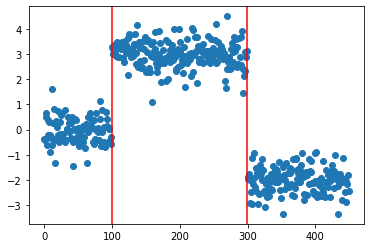

In [21]:
y1 = np.zeros(100)
y2 = 3+np.zeros(200)
y3 = -2+np.zeros(150)
y = np.concatenate((y1, y2, y3))
y += np.random.normal(0, 0.5, len(y))


loss = BiWeight(0, 2.5, 0, 0)
cp = rfpop(y, loss, 10)
taus = [elt[1] for elt in cp]
plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

loss = Huber(0, 2.5, 0, 0)
cp = rfpop(y, loss, 10)
taus = [elt[1] for elt in cp]
plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

loss = L2Loss(0, 0, 0)
cp = rfpop(y, loss, 10)
taus = [elt[1] for elt in cp]
plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

loss = L1Loss(0, 0, 0)
cp = rfpop(y, loss, 10)
taus = [elt[1] for elt in cp]
plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

100%|██████████| 45000/45000 [00:29<00:00, 1501.05it/s]


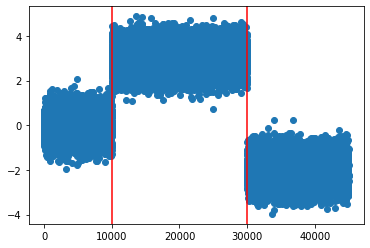

In [16]:
y1 = np.zeros(10000)
y2 = 3+np.zeros(20000)
y3 = -2+np.zeros(15000)
y = np.concatenate((y1, y2, y3))
y += np.random.normal(0, 0.5, len(y))
cp = rfpop(y, 2.5, 10)
taus = [elt[1] for elt in cp]

plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()